# Analyzing csv

## Read csv

In [15]:
import csv



file_name = "PT_16.csv"
dir_name = "pt_fixtures"

games = []

with open(dir_name +  "/" + file_name, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        row[2] = int(row[2])
        row[3] = int(row[3])
        games += [row]

print(len(games))
teams = []

for g in games:
    for i in range(0, 2):
        if(not g[i] in teams):
            teams += [g[i]]

153


## Compute how many goals difference each team has

In [51]:
goal_difference = dict(zip(teams, [0]*len(teams)))
goals_scored = dict(zip(teams, [0]*len(teams)))
goals_suffered = dict(zip(teams, [0]*len(teams)))
home_goals_scored = dict(zip(teams, [0]*len(teams)))
home_goals_suffered = dict(zip(teams, [0]*len(teams)))
away_goals_scored = dict(zip(teams, [0]*len(teams)))
away_goals_suffered = dict(zip(teams, [0]*len(teams)))

away_goal_difference = dict(zip(teams, [0]*len(teams)))
home_goal_difference = dict(zip(teams, [0]*len(teams)))

for g in games:
    goal_difference[g[0]] += g[2] - g[3]
    goal_difference[g[1]] += g[3] - g[2]
    
    goals_scored[g[0]] += g[2]
    goals_suffered[g[0]] += g[3]
    goals_scored[g[1]] += g[3]
    goals_suffered[g[1]] += g[2]
    
    home_goals_scored[g[0]] += g[2]
    home_goals_suffered[g[0]] += g[3]
    away_goals_scored[g[1]] += g[3]
    away_goals_suffered[g[1]] += g[2]
    
    away_goal_difference[g[1]] += g[3] - g[2]
    home_goal_difference[g[0]] += g[2] - g[3]
    

## Plot the goal difference of each team, as well as scored and suffered goals

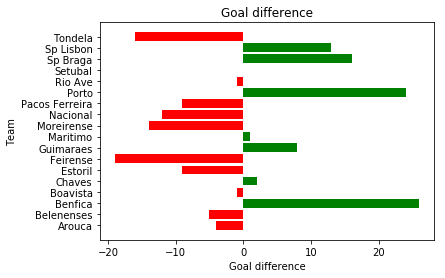

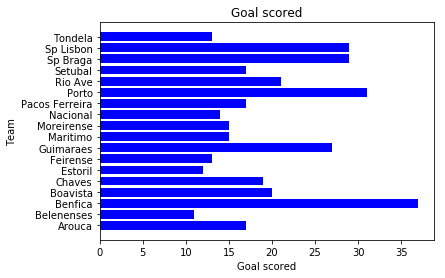

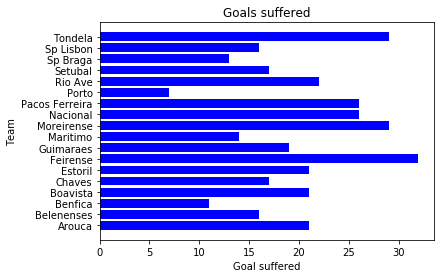

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


goal_colors = []
goal_values = list(goal_difference.values())
for i in range(0, len(goal_values)):
    if(goal_values[i] > 0):
        goal_colors += ['g']
    else:
        goal_colors += ['r']

plt.title("Goal difference")
plt.xlabel("Goal difference")
plt.ylabel("Team")
plt.barh(list(goal_difference.keys()), goal_values, color=goal_colors)
plt.show()


plt.figure()
plt.title("Goal scored")
plt.xlabel("Goal scored")
plt.ylabel("Team")
plt.barh(list(goals_scored.keys()), list(goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered")
plt.xlabel("Goal suffered")
plt.ylabel("Team")
plt.barh(list(goals_suffered.keys()), list(goals_suffered.values()), color='b')
plt.show()


## Plot scored/suffered goals at home and away

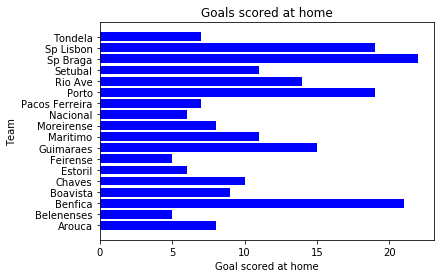

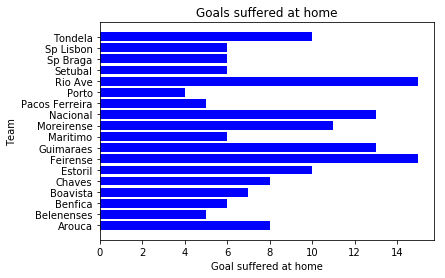

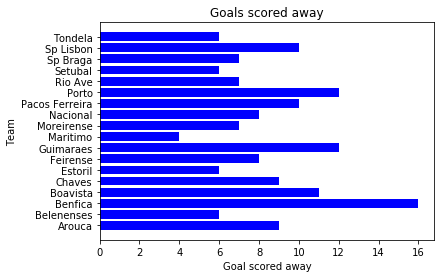

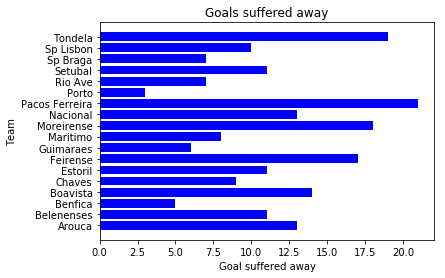

In [49]:

plt.figure()
plt.title("Goals scored at home")
plt.xlabel("Goal scored at home")
plt.ylabel("Team")
plt.barh(list(home_goals_scored.keys()), list(home_goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered at home")
plt.xlabel("Goal suffered at home")
plt.ylabel("Team")
plt.barh(list(home_goals_suffered.keys()), list(home_goals_suffered.values()), color='b')
plt.show()



plt.figure()
plt.title("Goals scored away")
plt.xlabel("Goal scored away")
plt.ylabel("Team")
plt.barh(list(away_goals_scored.keys()), list(away_goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered away")
plt.xlabel("Goal suffered away")
plt.ylabel("Team")
plt.barh(list(away_goals_suffered.keys()), list(away_goals_suffered.values()), color='b')
plt.show()

## Plot the goal difference home/away

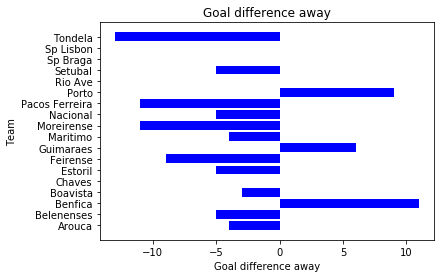

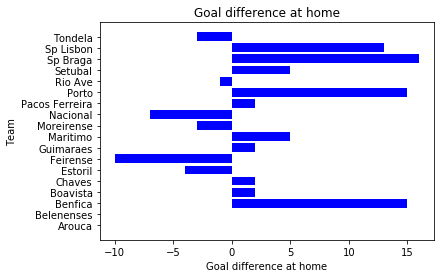

In [52]:
plt.figure()
plt.title("Goal difference away")
plt.xlabel("Goal difference away")
plt.ylabel("Team")
plt.barh(list(away_goal_difference.keys()), list(away_goal_difference.values()), color='b')
plt.show()

plt.figure()
plt.title("Goal difference at home")
plt.xlabel("Goal difference at home")
plt.ylabel("Team")
plt.barh(list(home_goal_difference.keys()), list(home_goal_difference.values()), color='b')
plt.show()